importing required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Reading in the dataset

In [2]:
dataset = pd.read_csv('G:\#UTD - MSCS\CS6375 - Machine Learning\Project\\adults_dataset\\adult.data', header=None,delimiter=',')

In [3]:
test_dataset = pd.read_csv('G:\#UTD - MSCS\CS6375 - Machine Learning\Project\\adults_dataset\\adult.test', header=None,delimiter=',')

In [4]:
dataset = pd.concat([dataset, test_dataset])

Column names to be used in the dataframe

In [5]:
dataset.columns = ["Age", "WorkClass", "fnlwgt", "Education", "EducationNum",
    "MaritalStatus", "Occupation", "Relationship", "Race", "Gender",
    "CapitalGain", "CapitalLoss", "HoursPerWeek", "NativeCountry", "Income"]

In [6]:
dataset.head()

,Age,WorkClass,fnlwgt,Education,EducationNum,MaritalStatus,Occupation,Relationship,Race,Gender,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [7]:
dataset.isnull().values.any()

False

In [8]:
dataset["Income"].unique()

array([' <=50K', ' >50K', ' <=50K.', ' >50K.'], dtype=object)

In [9]:
dataset['Income'] = dataset['Income'].map({' <=50K': -1, ' <=50K.': -1, ' >50K': 1, ' >50K.': 1})

In [10]:
dataset['Income']

0       -1
1       -1
2       -1
3       -1
4       -1
        ..
16276   -1
16277   -1
16278   -1
16279   -1
16280    1
Name: Income, Length: 48842, dtype: int64

In [11]:
y = dataset['Income'].values

In [12]:
dataset.drop('Income', axis=1, inplace=True)

In [13]:
dataset.head()

,Age,WorkClass,fnlwgt,Education,EducationNum,MaritalStatus,Occupation,Relationship,Race,Gender,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [14]:
dataset.describe()

,Age,fnlwgt,EducationNum,CapitalGain,CapitalLoss,HoursPerWeek
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


Since CapitalGain and CapitalLoss have a lot of 0's. We will drop them

In [15]:
dataset.drop(['CapitalGain', 'CapitalLoss'], axis=1, inplace=True)

In [16]:
dataset.head()

,Age,WorkClass,fnlwgt,Education,EducationNum,MaritalStatus,Occupation,Relationship,Race,Gender,HoursPerWeek,NativeCountry
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba


In [17]:
pd.unique(dataset['NativeCountry'])

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

Dropping Native Country as it is a categorical variable which has many unique values. It will create many features when it is one-hot encoded.

In [18]:
dataset.drop(['NativeCountry'], axis=1, inplace=True)

In [19]:
dataset['fnlwgt'] = dataset['fnlwgt'].astype(float)
dataset['EducationNum'] = dataset['EducationNum'].astype(int)
dataset['HoursPerWeek'] = dataset['HoursPerWeek'].astype(float)
dataset['Age'] = dataset['Age'].astype(int)

Since WorkClass, Education, MaritalStatus, Occupation, Relationship, Race, Gender are all categorical variables, we will convert them into numeric equivalents using one hot encoding

In [20]:
dataset = pd.get_dummies(dataset, columns=['WorkClass', 'Education', 'MaritalStatus', 
                                           'Occupation', 'Relationship', 'Race', 'Gender'])

In [21]:
dataset.head()

,Age,fnlwgt,EducationNum,HoursPerWeek,WorkClass_ ?,WorkClass_ Federal-gov,WorkClass_ Local-gov,WorkClass_ Never-worked,WorkClass_ Private,WorkClass_ Self-emp-inc,...,Relationship_ Own-child,Relationship_ Unmarried,Relationship_ Wife,Race_ Amer-Indian-Eskimo,Race_ Asian-Pac-Islander,Race_ Black,Race_ Other,Race_ White,Gender_ Female,Gender_ Male
0,39,77516.0,13,40.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,50,83311.0,13,13.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2,38,215646.0,9,40.0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
3,53,234721.0,7,40.0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
4,28,338409.0,13,40.0,0,0,0,0,1,0,...,0,0,1,0,0,1,0,0,1,0


In [22]:
pd.value_counts(pd.Series(y))

-1    37155
 1    11687
dtype: int64

Scaling the continuous features

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
standard_scaler_cols = ["Age", "fnlwgt", "EducationNum", "HoursPerWeek",]

In [25]:
dataset[standard_scaler_cols] = StandardScaler().fit_transform(dataset[standard_scaler_cols].values)

In [26]:
dataset.head()

,Age,fnlwgt,EducationNum,HoursPerWeek,WorkClass_ ?,WorkClass_ Federal-gov,WorkClass_ Local-gov,WorkClass_ Never-worked,WorkClass_ Private,WorkClass_ Self-emp-inc,...,Relationship_ Own-child,Relationship_ Unmarried,Relationship_ Wife,Race_ Amer-Indian-Eskimo,Race_ Asian-Pac-Islander,Race_ Black,Race_ Other,Race_ White,Gender_ Female,Gender_ Male
0,0.025996,-1.061979,1.136512,-0.034087,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,0.828308,-1.007104,1.136512,-2.213032,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2,-0.046942,0.246034,-0.419335,-0.034087,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
3,1.047121,0.426663,-1.197259,-0.034087,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
4,-0.776316,1.408530,1.136512,-0.034087,0,0,0,0,1,0,...,0,0,1,0,0,1,0,0,1,0


importing required scikit learn modules, functions

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve

In [28]:
%%capture captured
fig, ax=plt.subplots()

Spliting the dataset into training and testing sets and stratifying on target label (y), so that both the sets have all the target classes in equal proportions

In [29]:
X_train, X_test, y_train, y_test = train_test_split(dataset, y, test_size=0.25, stratify=y, random_state=43)

#### functions to fit estimator and plot useful graphs to evaluate a model

In [30]:
def plot_train_valid_scores(clf, axes=None, cv=None):
    if cv == None:
        cv = 5
    train_sizes = np.linspace(.1, 1.0, 5)
    train_sizes, train_scores, test_scores = learning_curve(clf, X_train, y_train, train_sizes=train_sizes, cv=cv)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    if axes == None:
        axes = plt
    # Plot learning curve
    axes.grid()
    axes.fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes.fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes.plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes.plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes.legend(loc="best")

In [31]:
def fitAndPredict(X_train, y_train, x_test, y_test, clf):
    res = []
    size = X_train.shape[0]
    # fit the model using training data
    clf.fit(X_train, y_train)
    # training score 
    res.append(clf.score(X_train, y_train))
    # test score
    res.append(clf.score(X_test, y_test))
    # confusion matrix
    res.append(confusion_matrix(clf.predict(X_test), y_test))
    # plot the ROC curve and compute AUC of ROC value
    return res

In [32]:
def printResults(res):
    print("Model score on training set {0}".format(res[0]))
    print("Model score on test set {0}".format(res[1]))
    print("Confusion Matrix:")
    print("{0}".format(res[2]))

In [33]:
def plot_roc(y_true, y_score, label=None):
    fpr, tpr, thresholds = roc_curve(y_true, y_score)
    auc_roc = auc(fpr, tpr)
    plt.figure()
    lw = 2
    ax.plot(fpr, tpr, lw=lw, label='ROC curve (area = %0.2f) {0}'.format(label) % auc_roc)
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic curve')
    ax.legend(loc="lower right")
    ax.plot([0, 1], [0, 1], color='grey', lw=lw, linestyle='--')

In [34]:
def plot_precision_recall_curve(y_true, y_score, label=None):
    precisions, recalls, thresholds = precision_recall_curve(y_true, y_score)
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.title("Precision Recall Curve for {0}".format(label))
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])
    return (precisions, recalls, thresholds)

In [35]:
def plot_precision_vs_recall(precisions, recalls, label):
    plt.plot(recalls, precisions)
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Recall vs Precision {0}".format(label))

### Logistic Regression

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
log_reg = LogisticRegression(random_state=43, class_weight='balanced', solver='liblinear')
res = fitAndPredict(X_train, y_train, X_test, y_test, log_reg)
printResults(res)

Model score on training set 0.7916518795555677
Model score on test set 0.7820817295880763
Confusion Matrix:
[[7093  465]
 [2196 2457]]


In [38]:
y_score = log_reg.decision_function(X_test)

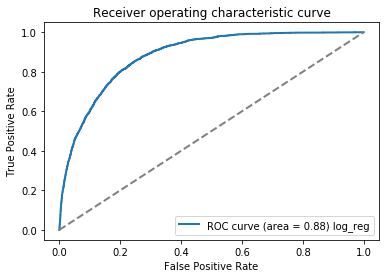

<Figure size 432x288 with 0 Axes>

In [39]:
plot_roc(y_test, y_score, 'log_reg')
fig

In [40]:
# plot_train_valid_scores(LogisticRegression(random_state=43, class_weight='balanced', solver='liblinear'))

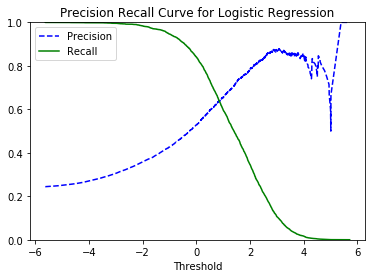

In [41]:
precisions, recalls, thresholds = plot_precision_recall_curve(y_test, y_score, "Logistic Regression")

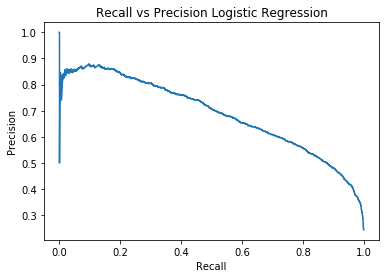

In [42]:
plot_precision_vs_recall(precisions, recalls, "Logistic Regression")

### Naive Bayes

In [43]:
from sklearn.naive_bayes import GaussianNB

In [44]:
gnb = GaussianNB()
res = fitAndPredict(X_train, y_train, X_test, y_test, gnb)
printResults(res)

Model score on training set 0.675739128060932
Model score on test set 0.6613708950945868
Confusion Matrix:
[[5482  328]
 [3807 2594]]


### Decision Tree Classifier
### Random Forest Classifier

In [45]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [46]:
def fitAndPredictTrees(tree_type='decision_tree', verbose=False):
    """ fit and predict on tree algorithms. 
        tree_type can be one of {'decision_tree', 'random_forest'} defaults to 'decision_tree'.
        raises ValueError on invalid value to tree_type parameter """
    best_depth = None
    best_clf = None
    best_res = [float("-inf"), float("-inf"), []]
    for i in range(1, 11):
        clf = None
        if tree_type == 'decision_tree':
            clf = DecisionTreeClassifier(max_depth=i, random_state=43)
        elif tree_type == 'random_forest':
            clf = RandomForestClassifier(max_depth=i, n_estimators=10, random_state=43)
        else:
            raise ValueError('Invalid tree_type')
        res = fitAndPredict(X_train, y_train, X_test, y_test, clf)
        if verbose: 
            print("Results at depth {0} using {1} model".format(i, tree_type))
            printResults(res)
        if res[1] > best_res[1]:
            best_res = res[:]
            best_depth = i
            best_clf = clf
    print("Best depth {0}".format(best_depth))
    printResults(best_res)
    return (best_depth, best_clf)

In [47]:
best_depth, dt_clf = fitAndPredictTrees('decision_tree', verbose=False)

Best depth 7
Model score on training set 0.8393983238240834
Model score on test set 0.8316272213577921
Confusion Matrix:
[[8422 1189]
 [ 867 1733]]


In [48]:
# plot_train_valid_scores(DecisionTreeClassifier(max_depth=best_depth, random_state=43))

In [49]:
y_score = dt_clf.predict_proba(X_test)[:, 1]

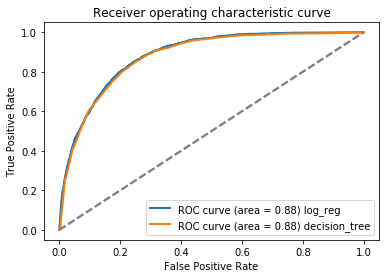

<Figure size 432x288 with 0 Axes>

In [50]:
plot_roc(y_test, y_score, "decision_tree")
fig

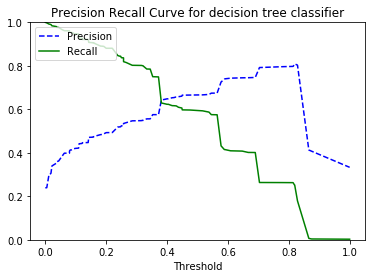

In [51]:
precisions, recalls, thresholds = plot_precision_recall_curve(y_test, y_score, "decision tree classifier")

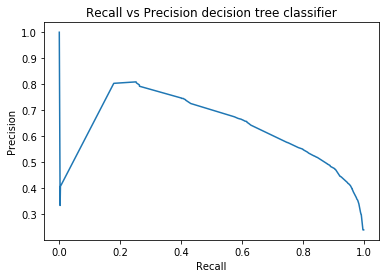

In [52]:
plot_precision_vs_recall(precisions, recalls, "decision tree classifier")

In [53]:
best_depth, rf_clf = fitAndPredictTrees('random_forest')

Best depth 9
Model score on training set 0.8406813900794409
Model score on test set 0.8344934894767013
Confusion Matrix:
[[8709 1441]
 [ 580 1481]]


In [54]:
y_score = rf_clf.predict_proba(X_test)[:, 1]

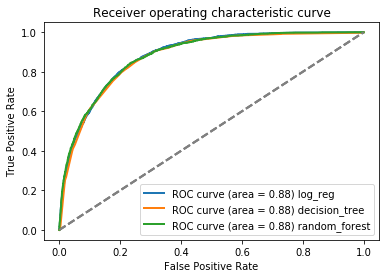

<Figure size 432x288 with 0 Axes>

In [55]:
plot_roc(y_test, y_score, label="random_forest")
fig

In [56]:
# plot_train_valid_scores(RandomForestClassifier(max_depth=best_depth, random_state=43, n_estimators=10))

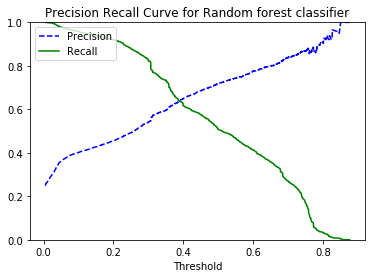

In [57]:
precisions, recalls, thresholds = plot_precision_recall_curve(y_test, y_score, "Random forest classifier")

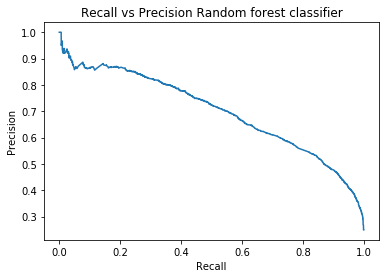

In [58]:
plot_precision_vs_recall(precisions, recalls, "Random forest classifier")

### Neural Network (Multi Level Perceptron)

In [59]:
from sklearn.neural_network import MLPClassifier

In [60]:
nnc = MLPClassifier(hidden_layer_sizes=[100, 50], activation='tanh', max_iter=200, random_state=43, early_stopping=True)

In [61]:
res = fitAndPredict(X_train, y_train, X_test, y_test, nnc)
printResults(res)

Model score on training set 0.8488711746881057
Model score on test set 0.8412087462124315
Confusion Matrix:
[[8669 1319]
 [ 620 1603]]


Text(0.5, 1.0, 'Neural Network Loss Across Epochs')

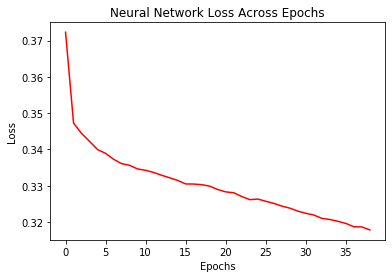

In [62]:
plt.plot(nnc.loss_curve_, color="red")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Neural Network Loss Across Epochs")

In [63]:
y_score = nnc.predict_proba(X_test)[:, 1]

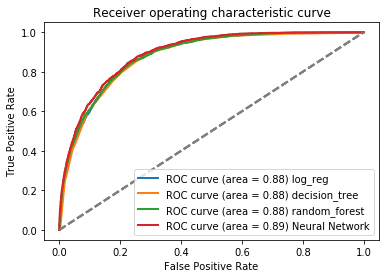

<Figure size 432x288 with 0 Axes>

In [64]:
plot_roc(y_test, y_score, "Neural Network")
fig

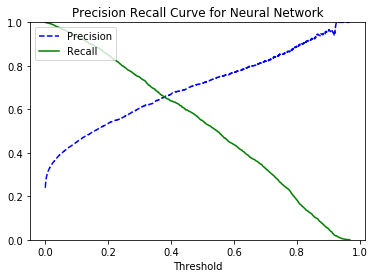

In [65]:
precisions, recalls, thresholds = plot_precision_recall_curve(y_test, y_score, "Neural Network")

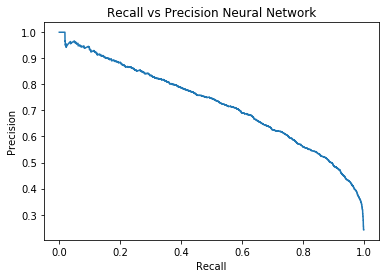

In [66]:
plot_precision_vs_recall(precisions, recalls, "Neural Network")

### Gradient Boosting Classifier

In [67]:
from sklearn.ensemble import GradientBoostingClassifier

In [68]:
gbc = GradientBoostingClassifier()

In [69]:
res = fitAndPredict(X_train, y_train, X_test, y_test, gbc)
printResults(res)

Model score on training set 0.8461412464852175
Model score on test set 0.8433379739579068
Confusion Matrix:
[[8624 1248]
 [ 665 1674]]


In [70]:
y_score = gbc.predict_proba(X_test)[:, 1]

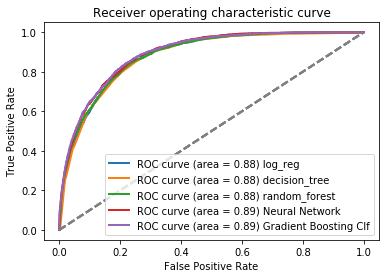

<Figure size 432x288 with 0 Axes>

In [71]:
plot_roc(y_test, y_score, "Gradient Boosting Clf")
fig

In [72]:
# plot_train_valid_scores(GradientBoostingClassifier())

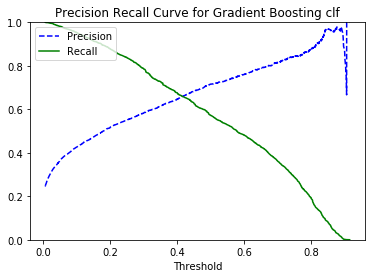

In [73]:
precisions, recalls, thresholds = plot_precision_recall_curve(y_test, y_score, "Gradient Boosting clf")

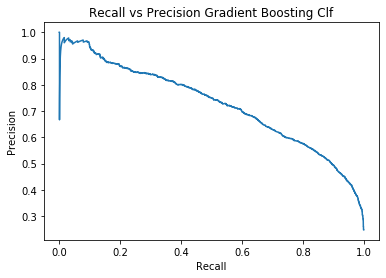

In [74]:
plot_precision_vs_recall(precisions, recalls, "Gradient Boosting Clf")

### Comparision of Models

In [75]:
def learning_curve_grid(clf, title, axes=None, ylim=None, cv=None):
    axes.set_title(title)
    if ylim is not None:
        axes.set_ylim(*ylim)
    axes.set_xlabel("Training examples")
    axes.set_ylabel("Score")
    plot_train_valid_scores(clf, axes, cv)

In [76]:
%%capture
fig, axes = plt.subplots(3, 2, figsize=(10, 15))

In [77]:
title="Logistic Regression"
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=43)
estimator = LogisticRegression(random_state=43, class_weight='balanced', solver='liblinear')
learning_curve_grid(estimator, title, axes=axes[0, 0], ylim=(0.69, 0.82), cv=cv)

title="Gaussian Navie Bayes"
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=43)
estimator = GaussianNB()
learning_curve_grid(estimator, title, axes=axes[0, 1], ylim=(0.55, 0.7), cv=cv)

title="Decision Tree Classifier"
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=43)
estimator = DecisionTreeClassifier(max_depth=best_depth, random_state=43)
learning_curve_grid(estimator, title, axes=axes[1, 0], ylim=(0.70, 0.95), cv=cv)

title="Random Forest Classifier"
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=43)
estimator = RandomForestClassifier(max_depth=best_depth, random_state=43)
learning_curve_grid(estimator, title, axes=axes[1, 1], ylim=(0.70, 0.95), cv=cv)

title="Neural Network"
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=43)
estimator = MLPClassifier(hidden_layer_sizes=[100, 50], activation='tanh', max_iter=200, random_state=43, early_stopping=True)
learning_curve_grid(estimator, title, axes=axes[2, 0], ylim=(0.70, 0.95), cv=cv)

title="Gradient Descent Classifier"
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=43)
estimator = GradientBoostingClassifier()
learning_curve_grid(estimator, title, axes=axes[2, 1], ylim=(0.70, 0.95), cv=cv)

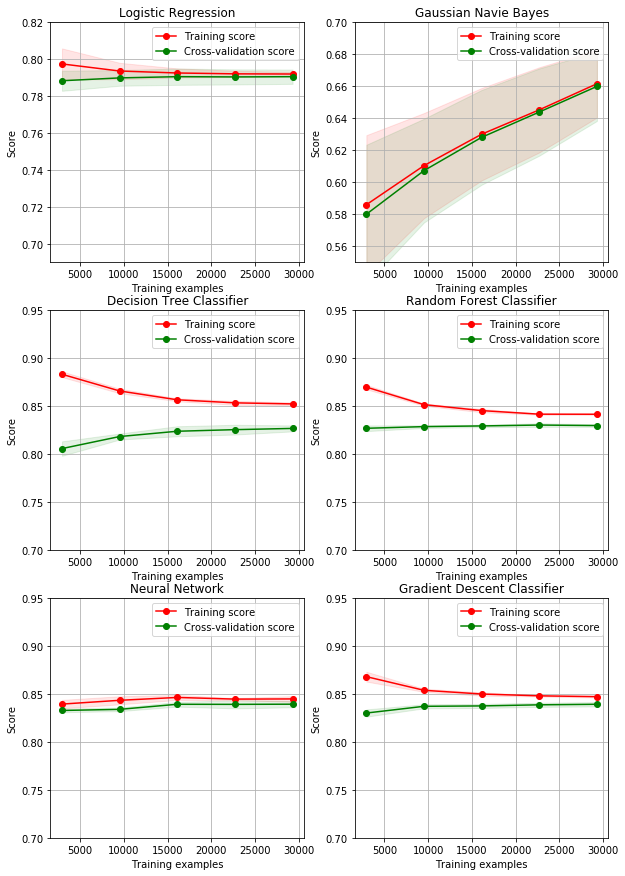

In [78]:
fig

It is clear from the above plots that none of the models are overfitting. Moreover, these plots also prove the fact that more input data can help in fitting more robust models, as we can see that some estimators have a considerable difference in the train and test scores when fitted on a small fraction of the dataset.

### Extracting Feature Importances using the trained Random Forest Classifier

In [79]:
importances = rf_clf.feature_importances_

In [80]:
std = np.std([tree.feature_importances_ for tree in rf_clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
cols = dataset.columns
print("Feature ranking:")
for f in range(X_train.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, cols[indices[f]], importances[indices[f]]))

Feature ranking:
1. feature MaritalStatus_ Married-civ-spouse (0.291033)
2. feature EducationNum (0.157377)
3. feature Relationship_ Husband (0.093518)
4. feature HoursPerWeek (0.063421)
5. feature Age (0.060136)
6. feature MaritalStatus_ Never-married (0.056732)
7. feature Education_ Bachelors (0.036317)
8. feature Occupation_ Exec-managerial (0.029174)
9. feature Occupation_ Prof-specialty (0.028068)
10. feature Relationship_ Wife (0.018014)
11. feature MaritalStatus_ Divorced (0.014120)
12. feature Relationship_ Not-in-family (0.012541)
13. feature fnlwgt (0.012270)
14. feature Education_ Prof-school (0.009959)
15. feature Education_ Masters (0.008895)
16. feature Gender_ Female (0.008662)
17. feature Education_ HS-grad (0.008441)
18. feature Education_ Some-college (0.008282)
19. feature Gender_ Male (0.008274)
20. feature Education_ Doctorate (0.007488)
21. feature Occupation_ Other-service (0.005779)
22. feature Relationship_ Own-child (0.005197)
23. feature WorkClass_ Self-emp-n

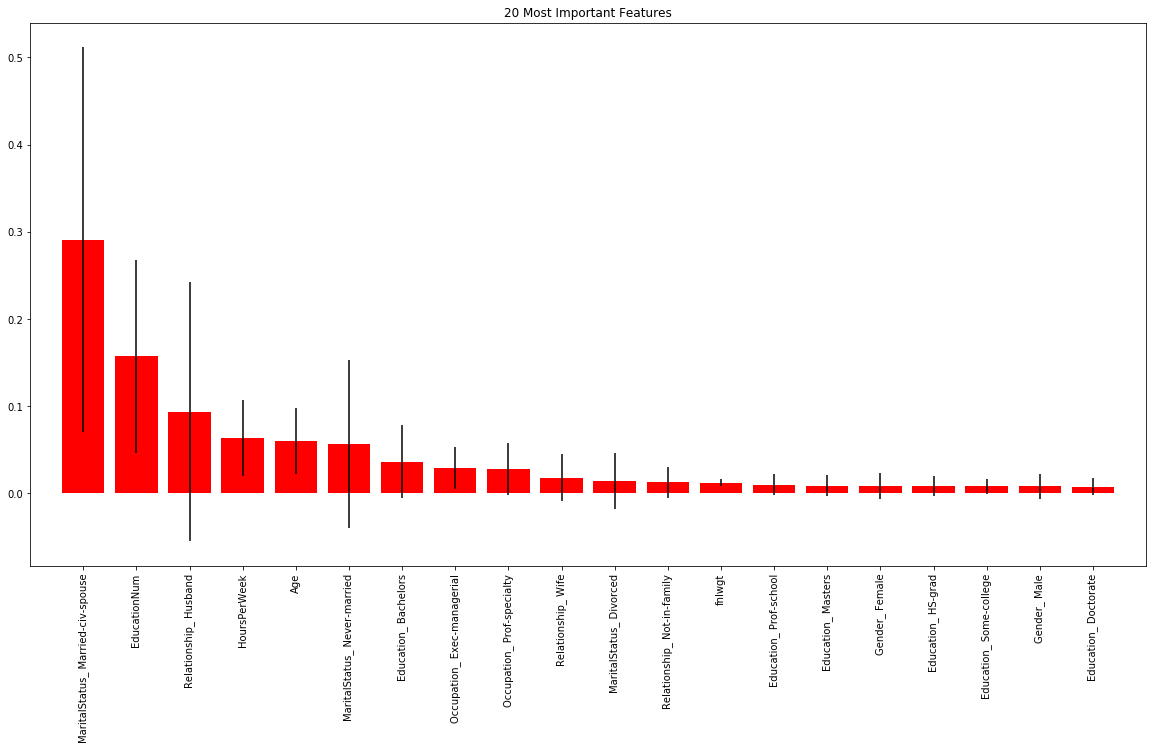

In [81]:
num_features = 20
plt.figure(figsize=(20, 10))
plt.title("%d Most Important Features" % num_features)
plt.bar(range(num_features), importances[indices[:num_features]],
       color="r", yerr=std[indices[:num_features]], align="center")
plt.xticks(range(num_features), cols[indices[:num_features]], rotation="vertical")
plt.xlim([-1, num_features])
plt.show()

#### Marital Status, Education, Relationship, Hours Per week are some of the most important predictors of a person's annual income